In [161]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
# Reading the dataset
data = pd.read_csv("Billionaire.csv")

In [163]:
data.head(5)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [164]:
data.describe()

,Rank,Age
count,2755.000000,2676.000000
mean,1345.663521,63.113602
std,772.669811,13.445153
min,1.000000,18.000000
25%,680.000000,54.000000
50%,1362.000000,63.000000
75%,2035.000000,73.000000
max,2674.000000,99.000000


In [165]:
# Checking the null values in the dataset
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [166]:
## This dataset as 79 missing value, we can remove these rows
data = data.dropna()

In [167]:
## Verifying the null values again
data.isnull().sum()

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

In [168]:
# Cleansing the dataset
# It seems, the networth column, as $ sign and B. We need to remove these sign/symbol and convert the amount into float

data["NetWorth"] = data["NetWorth"].str.strip("$")
data["NetWorth"] = data["NetWorth"].str.strip("B")
data["NetWorth"] = data["NetWorth"].astype(float)

In [169]:
data.head(5)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


In [170]:
# Sorting Top 10 Billionaries by NetWorth

df = data.sort_values(by = ["NetWorth"], ascending = False).head(10)
df.plot

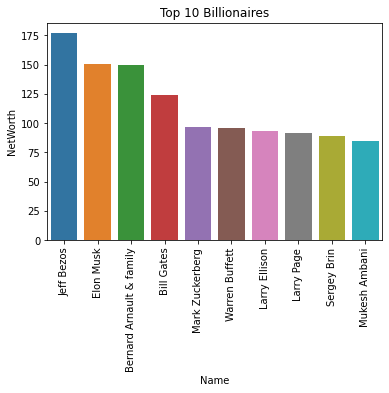

In [171]:
# Plotting the Top 10 Billionaries

sns.barplot(x = "Name", y = "NetWorth", data=df)
plt.xticks(rotation = 90)
plt.title("Top 10 Billionaires")
plt.show()

In [173]:
# Grouping the Industry count, to analyze Billionaires by Industry

count_industry = data[['Industry']].groupby(['Industry']).size().reset_index(name = "counts")
count_industry.sort_values('counts', ascending = False)

,Industry,counts
5,Finance & Investments,365
16,Technology,355
10,Manufacturing,317
4,Fashion & Retail,268
8,Healthcare,213
13,Real Estate,211
6,Food & Beverage,204
2,Diversified,180
3,Energy,99
11,Media & Entertainment,92


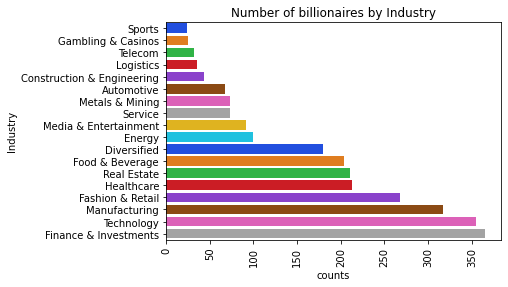

In [174]:
sns.barplot(x = count_industry["counts"], 
            y = count_industry["Industry"],
            data = count_industry,
            order = count_industry.sort_values('counts').Industry, palette = "bright")
plt.xticks(rotation = 90)
plt.title("Number of billionaires by Industry")
plt.show()

In [ ]:
# Per the plot, it seems that Finance & Investment has the highest number of Billionaries i.e.365

In [185]:
data

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1.0,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,1.0,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,1.0,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,1.0,China,conglomerate,2674,58.0,Diversified


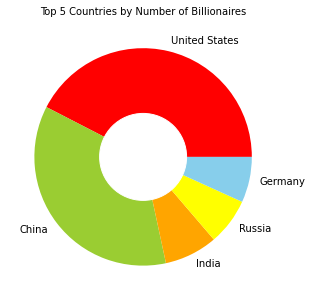

In [257]:
# Grouping the Country count, to analyze Billionaires by Country

a = data["Country"].value_counts().head(5)
index = a.index
Countries = a.values
custom_colors = ("red", "yellowgreen", 'orange', "yellow", "skyblue")
plt.figure(figsize=(5, 5))
plt.pie(Countries, labels = index,colors = custom_colors)
central_circle = plt.Circle((0, 0), 0.4, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.title("Top 5 Countries by Number of Billionaires", fontsize = 10)
plt.show()

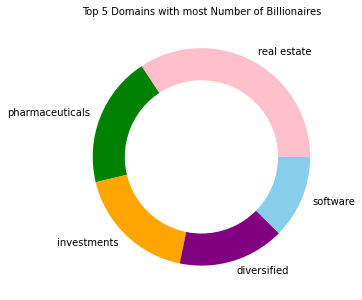

In [282]:
a = data["Source"].value_counts().head(5)
index = a.index
Sources = a.values
custom_colors = ("pink", "green", 'orange', "purple", "skyblue")
plt.figure(figsize=(5, 5))
plt.pie(Sources, labels = index,colors = custom_colors)
central_circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.title("Top 5 Domains with most Number of Billionaires", fontsize = 10)
plt.show()

In [223]:
data

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1.0,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,1.0,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,1.0,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,1.0,China,conglomerate,2674,58.0,Diversified


In [258]:
# To know the details of the countries, with highest wealth
total_networth = pd.pivot_table(data=data, index='Country', values='NetWorth', aggfunc=['sum'])

In [259]:
total_networth.sort_values(by=('sum', 'NetWorth'), ascending=False).head(20)

,sum
,NetWorth
Country,
United States,4384.7
China,2496.1
Russia,586.0
Germany,576.6
India,567.3
France,507.6
Hong Kong,428.4
Japan,222.2


In [ ]:
# Per the above chart, it seems that billionaries are living in United States having the combined networth of 4.3 Trillion Dollars